In [1]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib
import matplotlib.pyplot as plt
import os
# Make plots bigger
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

# Working with time Series
We first download the data with our api key.

In [22]:
ts = TimeSeries(key=os.environ['API_KEY'], output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
# We can describe it
data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,3910.000000,3910.000000,3910.000000,3910.000000,3.910000e+03
mean,85.658983,85.677033,85.639585,85.658479,3.821503e+04
std,0.339009,0.338582,0.339146,0.338879,1.679918e+05
min,84.730000,84.800000,84.710000,84.735800,1.266000e+03
25%,85.405000,85.420000,85.385000,85.410000,1.276675e+04
50%,85.645000,85.660000,85.630000,85.645000,2.136550e+04
75%,85.880000,85.900000,85.860000,85.880000,3.551050e+04
max,86.499000,86.510000,86.440000,86.494100,5.589127e+06


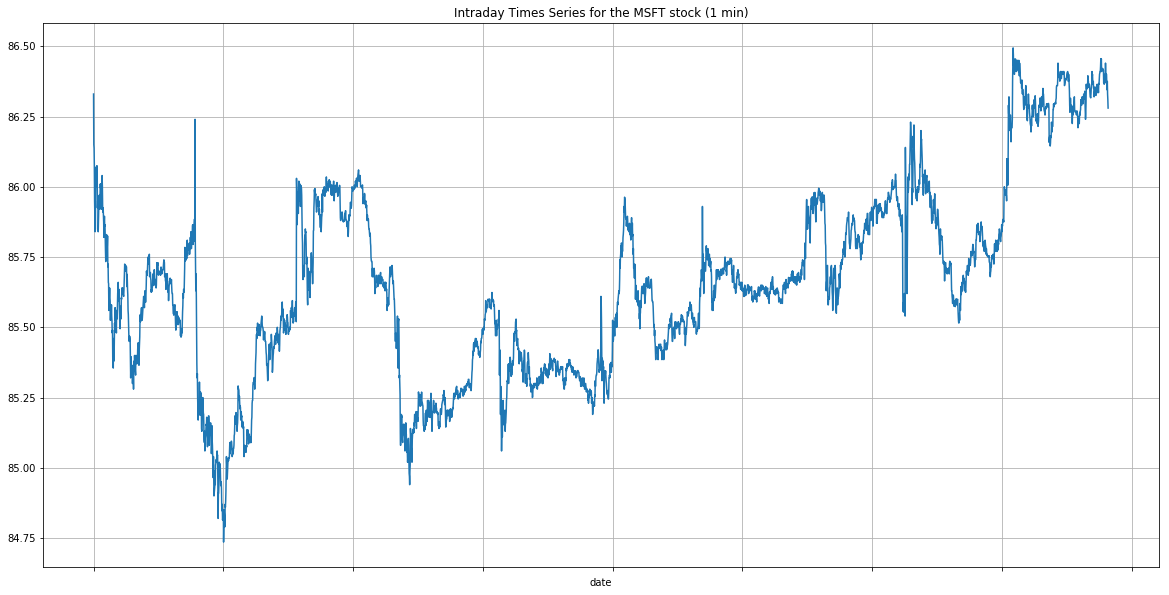

In [23]:
data.describe()
data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.grid()
plt.show()

Check the meta data given back by the api call.

In [24]:
meta_data

{'1. Information': 'Intraday (1min) prices and volumes',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2018-01-03 16:00:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

## Getting csv data

In [25]:
ts = TimeSeries(key=os.environ['API_KEY'], output_format='csv')
data_csv,_ = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='compact')
data_csv

## Plotting time series

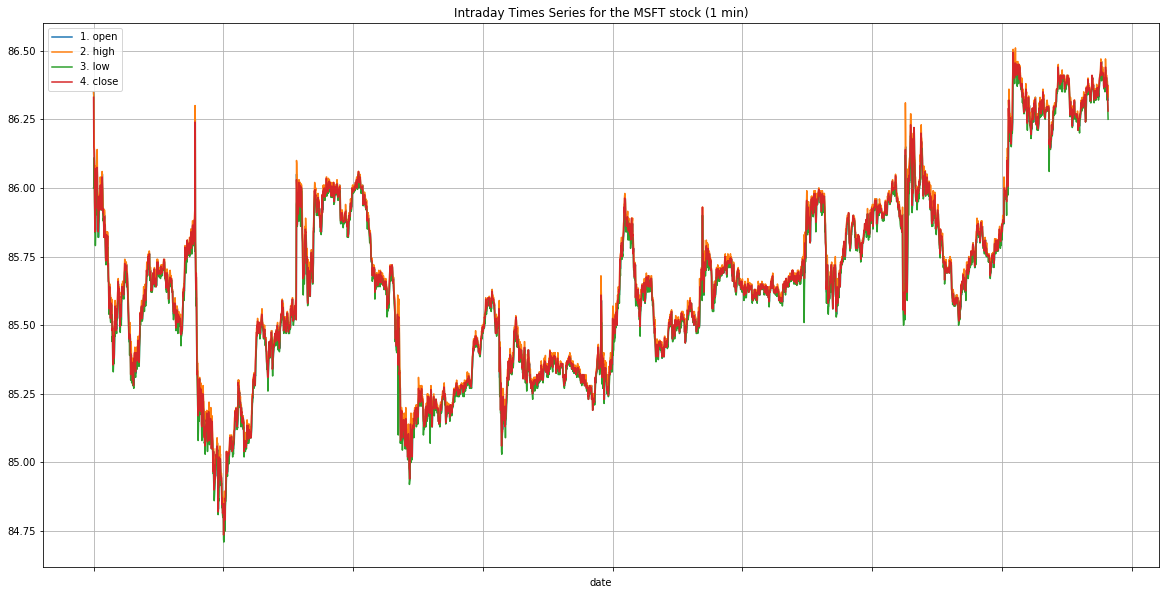

In [26]:
data = data.drop('5. volume',1)
data.plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.grid()
plt.show()

# Working with batch quotes

In [29]:
# It is still a TimeSeries call
ts.output_format='pandas'
data, meta_data = ts.get_batch_stock_quotes(symbols=('MSFT', 'FB', 'AAPL'))
data.describe()

,1. symbol,2. price,3. volume,4. timestamp
count,3,3,3,3
unique,3,3,1,2
top,FB,172.0600,--,2018-01-03 15:59:58
freq,1,1,3,2


In [31]:
data.head(3)

,1. symbol,2. price,3. volume,4. timestamp
date,,,,
0,MSFT,86.3000,--,2018-01-03 15:59:59
1,FB,184.4800,--,2018-01-03 15:59:58
2,AAPL,172.0600,--,2018-01-03 15:59:58


# Working with technical indicators

In [9]:
ti = TechIndicators(key=os.environ['API_KEY'], output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.describe()

,Real Middle Band,Real Upper Band,Real Lower Band
count,11.000000,11.000000,11.000000
mean,85.611645,86.214027,85.009273
std,0.039812,0.096451,0.025967
min,85.569100,86.103600,84.968900
25%,85.577450,86.117450,84.992700
50%,85.602800,86.206100,85.012300
75%,85.633200,86.295450,85.033200
max,85.686500,86.355800,85.043200


In [10]:
meta_data

{'1: Symbol': 'MSFT',
 '2: Indicator': 'Bollinger Bands (BBANDS)',
 '3: Last Refreshed': '2018-01-03 16:00:00',
 '4: Interval': '60min',
 '5: Time Period': 60,
 '6.1: Deviation multiplier for upper band': 2,
 '6.2: Deviation multiplier for lower band': 2,
 '6.3: MA Type': 0,
 '7: Series Type': 'close',
 '8: Time Zone': 'US/Eastern Time'}

## Plotting technical indicators

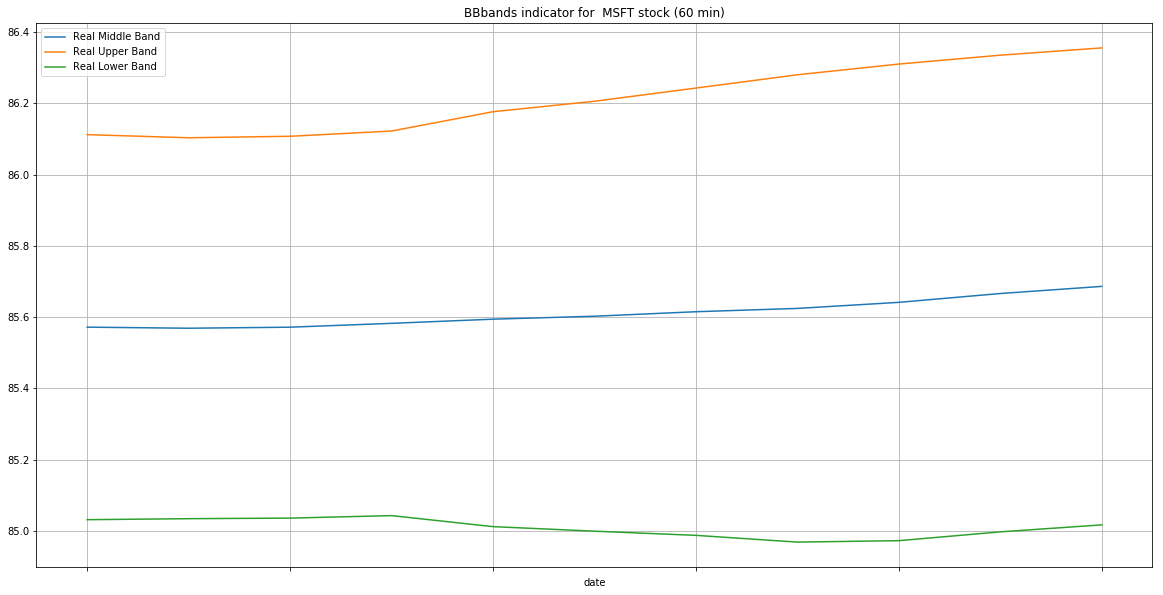

In [11]:
data.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.grid()
plt.show()

# Working with Sector Performance

In [12]:
sp = SectorPerformances(key=os.environ['API_KEY'], output_format='pandas')
data, meta_data = sp.get_sector()
data.describe()

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,10.000000,10.000000,10.000000
mean,0.002745,0.002745,0.007545,0.020836,0.055373,0.008600,0.151027,0.253480,0.721240,0.805070
std,0.010159,0.010159,0.016407,0.039578,0.044700,0.018032,0.135972,0.203729,0.453161,0.779563
min,-0.021700,-0.021700,-0.025600,-0.075500,-0.024300,-0.019500,-0.078000,-0.064300,0.010700,-0.091600
25%,0.000200,0.000200,-0.002550,0.013650,0.022900,-0.005500,0.066000,0.110000,0.484750,0.222725
50%,0.005300,0.005300,0.014100,0.030700,0.061400,0.012900,0.200600,0.248300,0.756500,0.679850
75%,0.008550,0.008550,0.019550,0.043350,0.082400,0.022400,0.231950,0.381075,1.066825,1.298925
max,0.015300,0.015300,0.027000,0.073800,0.115100,0.033400,0.403500,0.641300,1.370300,2.153500


In [13]:
meta_data

{'Information': 'US Sector Performance (realtime & historical)',
 'Last Refreshed': '04:20 PM ET 01/03/2018'}

## Plotting Sector Performance

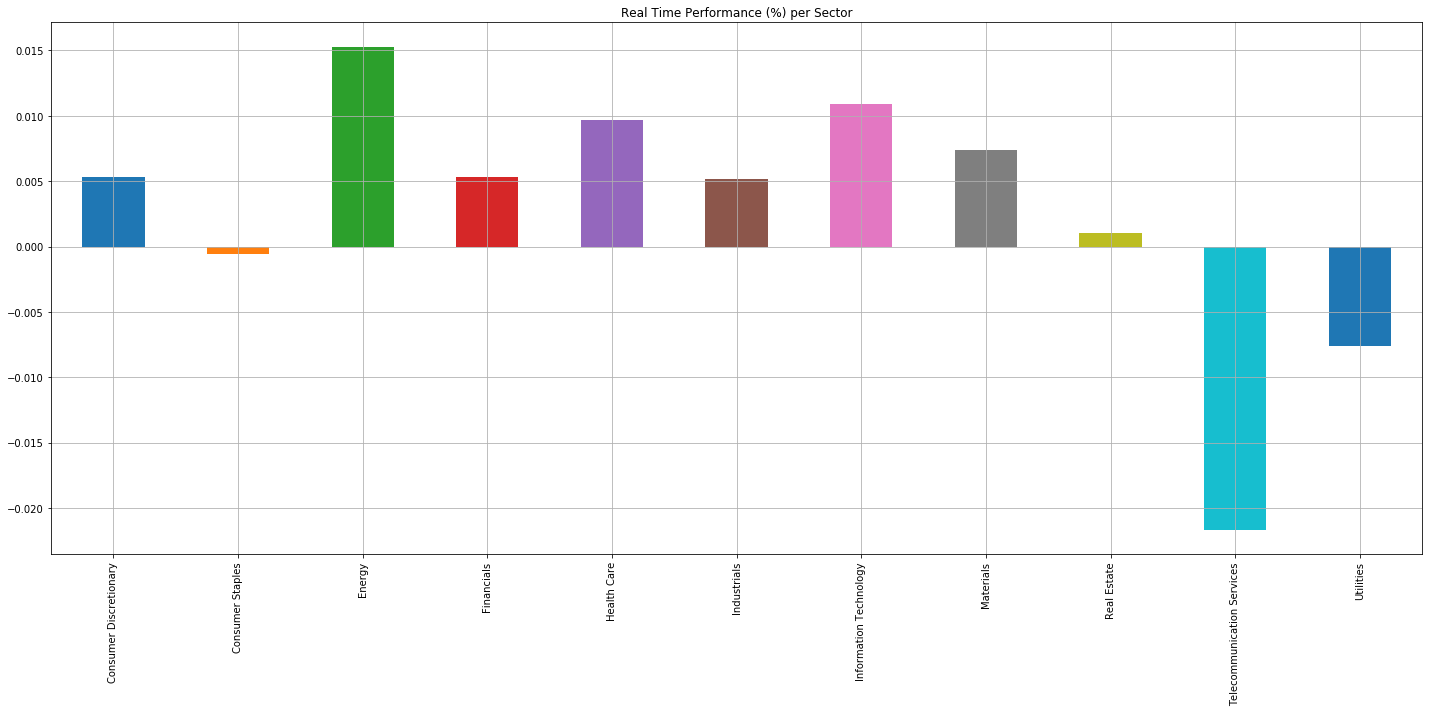

In [14]:
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

# Working with Crypto Currencies

To just get the current exchange rate

In [15]:
cc = CryptoCurrencies(key=os.environ['API_KEY'])

To get the intraday price of bitcoin 

In [16]:
# I changed the internal format of the the class to be our friendly data frame.
cc.output_format='pandas'
data, meta_data = cc.get_digital_currency_intraday(symbol='BTC', market='CNY')
data.describe()

,1a. price (CNY),1b. price (USD),2. volume,3. market cap (USD)
count,922.000000,922.000000,922.000000,922.000000
mean,92991.062733,14300.945469,0.166866,2386.971637
std,4394.086228,679.068238,0.023152,359.894840
min,85534.210870,13142.529558,0.122420,1695.678448
25%,88542.864820,13607.126501,0.148940,2110.466381
50%,94697.432190,14587.462789,0.170690,2377.083164
75%,96798.409910,14888.627226,0.185670,2640.120143
max,98548.361320,15159.653779,0.200390,2983.532010


In [17]:
data.head(5)

,1a. price (CNY),1b. price (USD),2. volume,3. market cap (USD)
date,,,,
2018-01-01 09:25:00,88187.41817,13507.550170,0.15565,2102.450184
2018-01-01 09:30:00,88187.41817,13507.550170,0.15565,2102.450184
2018-01-01 09:35:00,88187.41817,13553.116458,0.15565,2109.542577
2018-01-01 09:40:00,88187.41817,13553.116458,0.15565,2109.542577
2018-01-01 09:45:00,88542.86482,13607.743410,0.15975,2173.837010


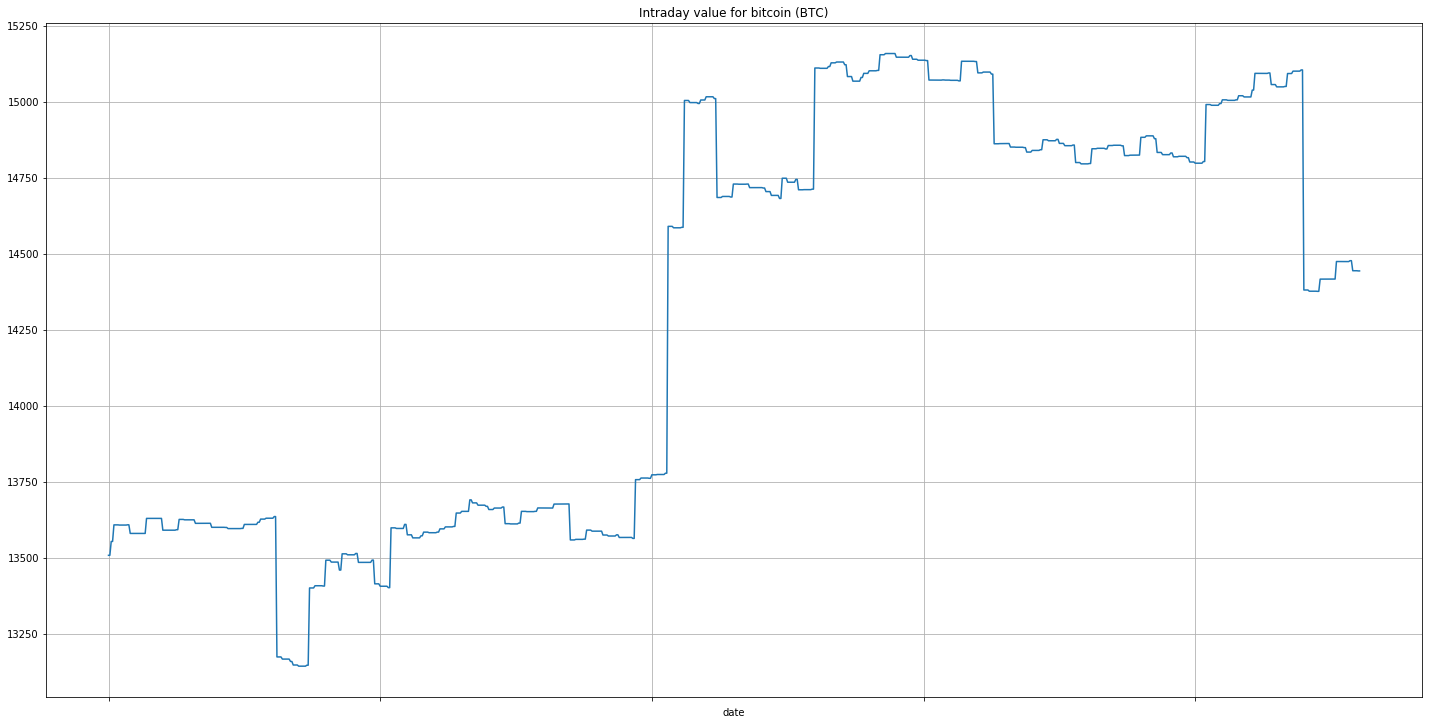

In [19]:
data['1b. price (USD)'].plot()
plt.tight_layout()
plt.title('Intraday value for bitcoin (BTC)')
plt.grid()
plt.show()